In [2]:
import sys
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
import torch
import copy

In [3]:
sys.path.append('../../WatChMaL//')

In [4]:
from watchmal.dataset.cnn_mpmt.cnn_mpmt_dataset import CNNmPMTDataset

In [5]:
sys.modules[CNNmPMTDataset.__module__]

<module 'watchmal.dataset.cnn_mpmt.cnn_mpmt_dataset' from '../../WatChMaL/watchmal/dataset/cnn_mpmt/cnn_mpmt_dataset.py'>

<h1>Define Plotting Functions</h1>

In [6]:
def plot_event(data, mpmt_pos, old_convention=False, title=None, style="default", cmap=plt.cm.jet, vertical_partition=False,
              padded=False, horizontal_partition=False):
    cmap = copy.copy(cmap)
    if style=="dark_background":
        edgecolor='0.15'
        cmap.set_bad(color='black')
    else:
        edgecolor='0.85'
        cmap.set_bad(color='white')
    data[data==0] = np.nan
    indices = np.indices(data.shape)
    channels = indices[0].flatten()
    positions = indices[1:].reshape(2,-1).astype(np.float64)
    positions += channel_to_position(channels)
    if old_convention:
        positions[1] = max(mpmt_pos[:, 1])-positions[1]
    mpmts = [Circle((pos[1], pos[0]), radius=0.47)
             for pos in mpmt_pos]
    with plt.style.context(style):
        if old_convention:
            figsize = (20,16)
        elif padded:
            figsize = (25,10)
        else:
            figsize = (20,12)
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111)
        ax.add_collection(PatchCollection(mpmts, facecolor='none', linewidths=1, edgecolors=edgecolor))
        pmts = ax.scatter(positions[1], positions[0], c=data.flatten(), s=3, cmap=cmap)
        plt.colorbar(pmts)
    if title is not None:
        ax.set_title(title)
    
    #New
    if vertical_partition:
        plt.axvline(x=data.shape[2]-1, c='r')
    
    if horizontal_partition:
        plt.axhline(y=data.shape[1]-1, c='r')

In [7]:
def channel_to_position(channel):
    channel = channel % 19 
    theta = (channel<12)*2*np.pi*channel/12 + ((channel >= 12) & (channel<18))*2*np.pi*(channel-12)/6
    radius = 0.2*(channel<18)+0.2*(channel<12)
    position = [radius*np.cos(theta), radius*np.sin(theta)] # note this is [y, x] or [row, column]
    return position

<h1>Load Data</h1>

In [8]:
data_path = "/fast_scratch/WatChMaL/data/IWCD_mPMT_Short/IWCD_mPMT_Short_emgp0_E0to1000MeV_digihits.h5"
data_file = h5py.File(data_path, "r")

In [9]:
data_file.keys()

<KeysViewHDF5 ['angles', 'energies', 'event_hits_index', 'event_ids', 'hit_charge', 'hit_pmt', 'hit_time', 'labels', 'positions', 'root_files', 'veto', 'veto2']>

In [10]:
np.array(data_file['positions']).shape

(23481549, 1, 3)

In [11]:
data_obj = CNNmPMTDataset(data_path, '/data/WatChMaL/data/IWCDshort_mPMT_image_positions.npz', is_distributed=False)

<h1>Scheme #1 - Standard Padding<h1>

In [12]:
barrel_rows = data_obj.barrel_rows

<h1>Scheme #2 - Extended Padding<h1>

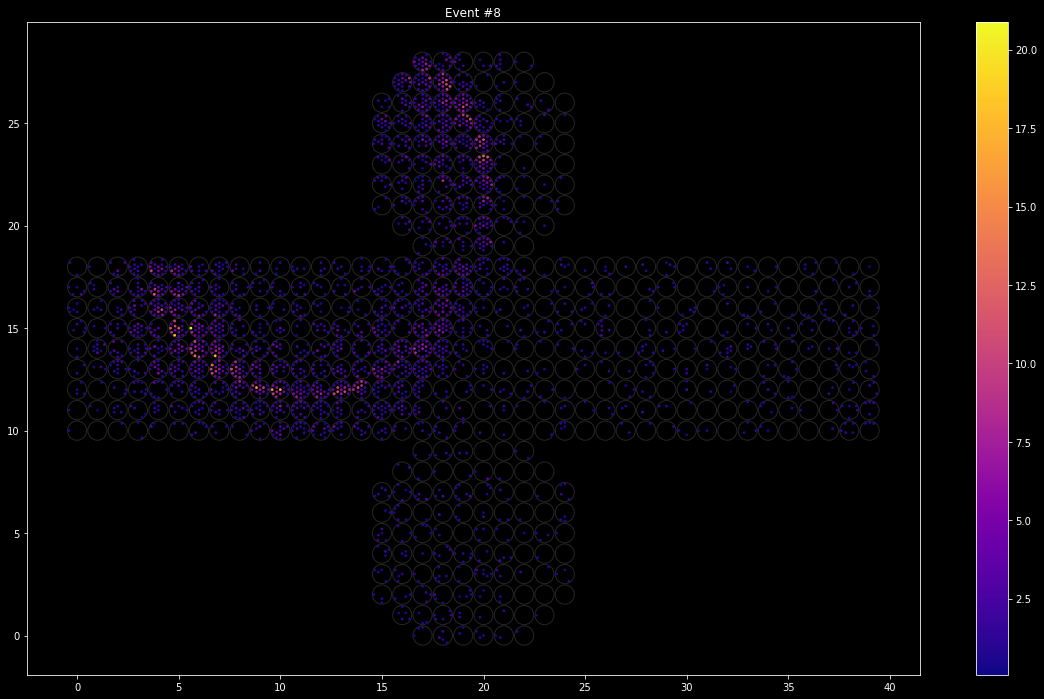

In [13]:
data_short_sch2 = data_obj.__getitem__(8)['data']
plot_event(data_short_sch2, data_obj.mpmt_positions, title="Event #{}".format(8), style="dark_background", cmap=plt.cm.plasma)

In [14]:
horiz_pad_data = data_short_sch2.clone()

In [15]:
full_len_index = int(data_short_sch2.shape[2])
horiz_pad_data = torch.cat((horiz_pad_data, torch.zeros_like(data_short_sch2.clone()[:, :, :full_len_index])), 2)
horiz_pad_data[:, :, 2*full_len_index:] = torch.tensor(np.nan, dtype=torch.float64)

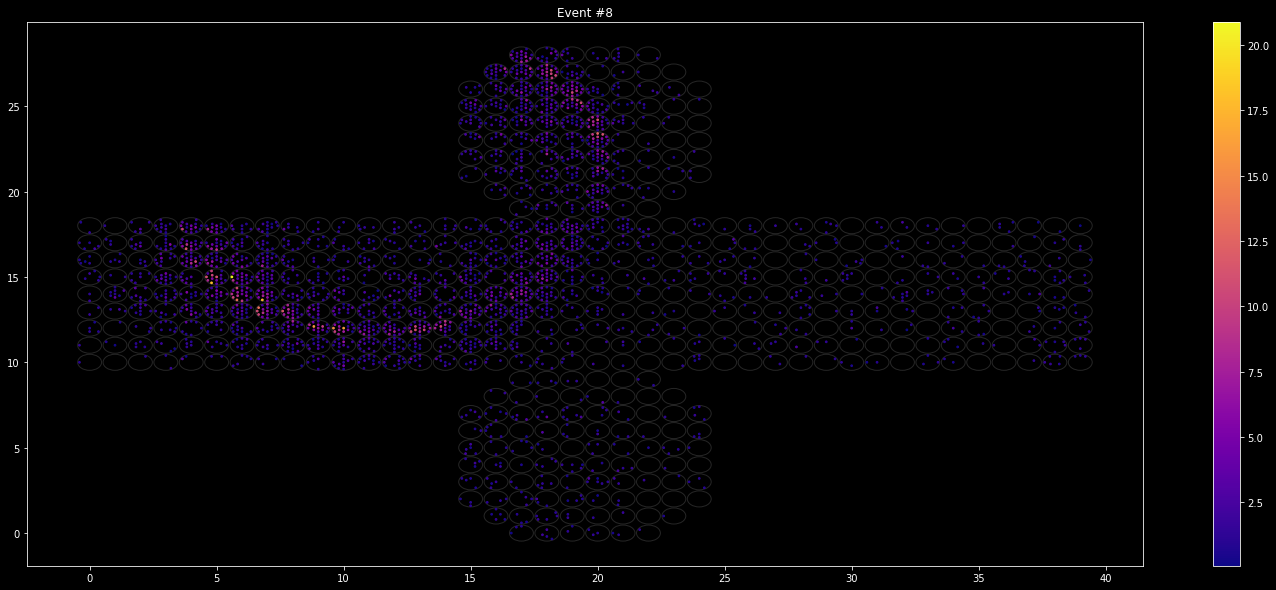

In [16]:
plot_event(horiz_pad_data, data_obj.mpmt_positions, title="Event #{}".format(8), style="dark_background", cmap=plt.cm.plasma,
        padded=True)

In [17]:
barrel_rows = data_obj.barrel_rows

In [18]:
horiz_pad_data.shape

torch.Size([19, 29, 80])

In [19]:
horiz_pad_data[:, barrel_rows, full_len_index:] = data_short_sch2.clone()[:, barrel_rows, :full_len_index]

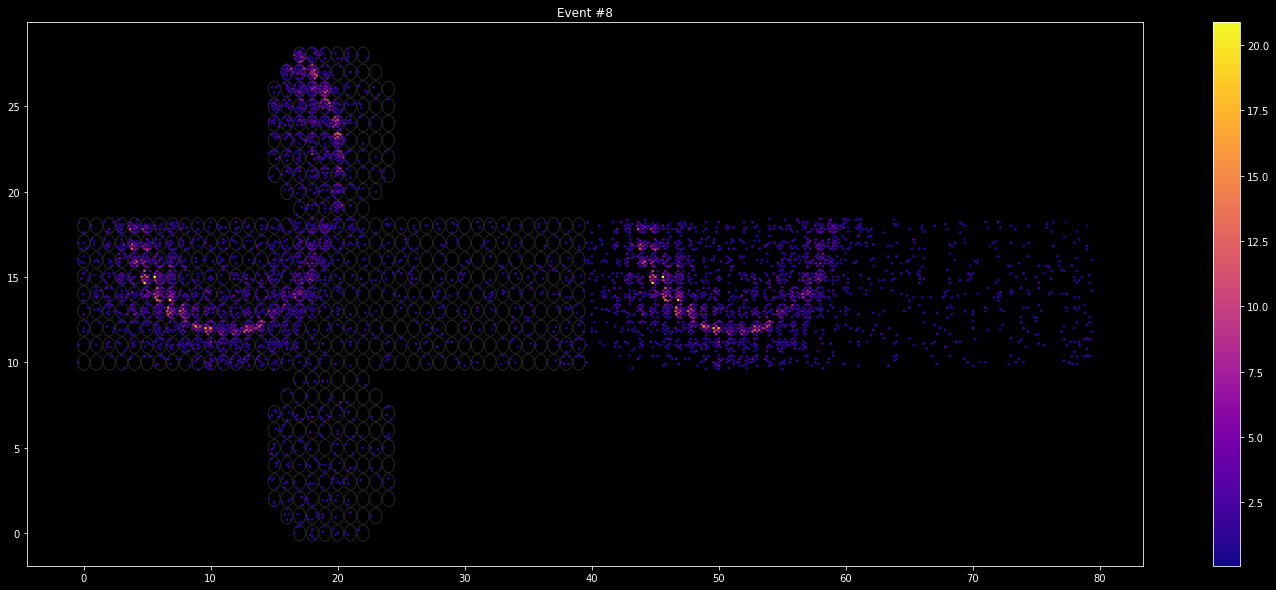

In [20]:
plot_event(horiz_pad_data, data_obj.mpmt_positions, title="Event #{}".format(8), style="dark_background", cmap=plt.cm.plasma,
        padded=True)

In [1]:
l_index = data_short.shape[2]/2 - 1
r_index = data_short.shape[2]/2

NameError: name 'data_short' is not defined

In [22]:
import torch.nn as nn

In [26]:
nn.Linear(1, 2).in_features

1